# Chapter 4. Developing the FastAPI Code

In Chapter 3, you created your database and the Python code to access the database. In this chapter, you will build on this foundation code to create a working API. Table 4-1 lists the endpoints that you will create to fulfill these user stories.

| Endpoint Description | HTTP Verb | URL |
| :--- | :---: | :--- |
| API health check | GET | `/` |
| Read player list | GET | `/v0/players/` |
| Read individual player | GET | `/v0/players/{player_id}/` |
| Read performance list | GET | `/v0/performances/` |
| Read league list | GET | `/v0/leagues/` |
| Read individual league | GET | `/v0/leagues/{league_id}/` |
| Read team list | GET | `/v0/teams/` |
| Read counts | GET | `/v0/counts/` |


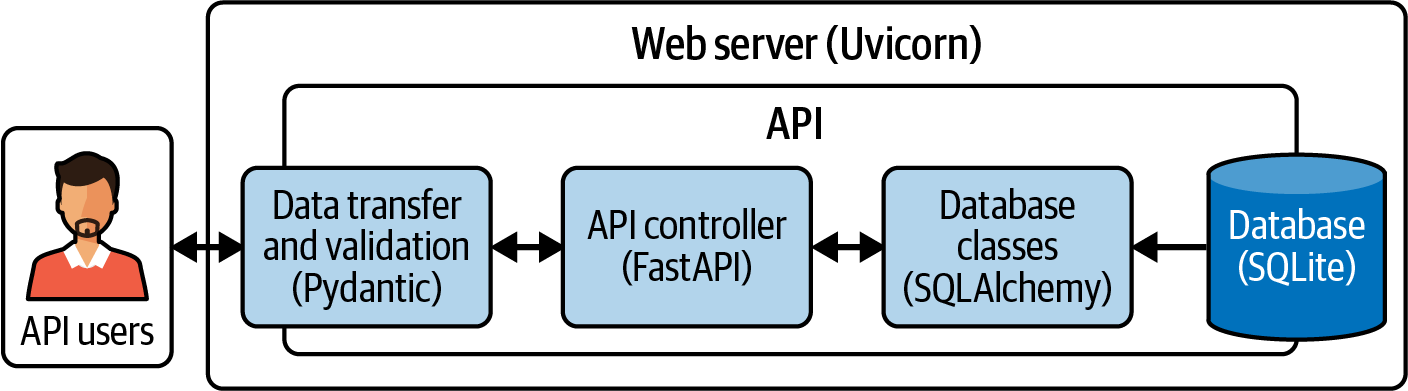

| Software name | Version | Purpose |
| :--- | :---: | :--- |
| `FastAPI` | 0 | Web framework to build the API |
| `FastAPI CLI` | 0 | Command-line interface for FastAPI |
| `HTTPX` | 0 | HTTP client for Python |
| `Pydantic` | 2 | Validation library |
| `Uvicorn` | 0 | Web server to run the API |

While FastAPI is currently the dominant player for modern Python APIs (especially in data science), there are several excellent, modern alternatives that have gained traction recently.

Here are the top modern contenders, categorized by why you might choose them over FastAPI.

### 1. Litestar (formerly Starlite)
**" The pragmatic, opinionated rival."**
Litestar is arguably the strongest direct competitor to FastAPI right now. It was created specifically to address some architectural choices in FastAPI that some developers find limiting (like the heavy reliance on Starlette and Pydantic v1 legacy code).

* **Why use it:** It has Dependency Injection that is often considered more powerful and decoupled than FastAPI's. It also includes "batteries" that FastAPI leaves to plugins (like built-in DTOs, caching, and more robust authentication patterns).
* **Vibe:** Strict, robust, and enterprise-ready.

### 2. Robyn
**" The speed demon (Rust-based)."**
Robyn is a newer framework that isn't just a Python wrapper; it has a web server written in Rust embedded directly into it.

* **Why use it:** Performance. Because the core event loop is in Rust, it can arguably outperform FastAPI (which runs on Uvicorn/Starlette) in raw throughput scenarios. It uses a very similar syntax to Flask/FastAPI.
* **Vibe:** Bleeding edge, focused on raw speed.

### 3. Sanic
**" The original async framework."**
Sanic predates FastAPI. It was the first major Python framework to embrace `async/await` syntax before it was cool.

* **Why use it:** It is incredibly stable and mature while still being very fast. If you want async performance but don't care about the automatic documentation (Swagger UI) or Pydantic validation that FastAPI forces on you, Sanic is a great "pure" async HTTP server.
* **Vibe:** Mature, minimalist, fast.

### 4. Django Ninja
**" FastAPI, but for Django."**
If you already use Django for your ORM or admin panel, switching to FastAPI can be jarring. Django Ninja allows you to write API endpoints inside Django using exactly the same syntax and Pydantic schemas as FastAPI.

* **Why use it:** You get the safety and ecosystem of Django (Admin, ORM, Auth) with the modern developer experience of FastAPI.
* **Vibe:** The best of both worlds for Django users.

### Summary Comparison Table

| Framework | Best For | Key Difference from FastAPI |
| :--- | :--- | :--- |
| **Litestar** | Enterprise / OOP Design | More opinionated, arguably better architectural patterns. |
| **Robyn** | High Performance | Rust backend, potentially faster than Python-only loops. |
| **Sanic** | Custom Architectures | Does not enforce Pydantic/Type Hinting as strictly. |
| **Django Ninja**| Django Users | It *is* Django, just with FastAPI-style syntax. |

**Since you are already set up with `uv` and `sqlite`, would you like to see a "Hello World" comparison of Litestar vs. FastAPI to see the syntax difference?**

FastAPI also includes the FastAPI CLI. This is a separate Python library that is used to run FastAPI from the command line.

| Filename | Purpose |
| :--- | :--- |
| `main.py` | FastAPI file that defines routes and controls API |
| `schemas.py` | Defines the Pydantic classes that validate data sent to the API |
| `test_main.py` | The pytest file for the FastAPI program |

The Pydantic classes define the structure of the data that the consumer will receive in their API responses. This uses a software design pattern called data transfer objects (DTO), in which you define a format for transferring data between a producer and consumer, without the consumer needing to know the backend format. In your portfolio project, the backend and frontend classes won’t look significantly different, but using DTOs allows complete flexibility on this point.

Both SQLAlchemy and Pydantic documentation refer to their classes as models, which may be confusing at times. This is extra confusing for data science work, where models have additional meanings. For clarity, this book will refer to Pydantic schemas and SQLAlchemy models.

| Endpoint URL | Primary Schema | Secondary Schema |
| :--- | :--- | :--- |
| `/` | `None` | `None` |
| `/v0/players/` | `Player` | `Performance` |
| `/v0/players/{player_id}/` | `Player` | `Performance` |
| `/v0/performances/` | `Performance` | `None` |
| `/v0/leagues/` | `League` | `TeamBase` |
| `/v0/leagues/{league_id}` | `League` | `TeamBase` |
| `/v0/teams/` | `Team` | `PlayerBase` |
| `/v0/counts/` | `Counts` | `None` |

This is a very common point of confusion when starting with web servers, especially on WSL (Windows Subsystem for Linux).

The good news is: **Your code is working perfectly.** The tests passed, and the server started successfully.

The problem is simply which address you typed into Chrome/Edge.

### The Fix

In your browser, do not go to `0.0.0.0`. Instead, go to:

**[http://localhost:8000](https://www.google.com/search?q=http://localhost:8000)**

Or for the documentation:
**[http://localhost:8000/docs](https://www.google.com/search?q=http://localhost:8000/docs)**

-----

### Why is this happening?

1.  **Server vs. Browser:**

      * When the terminal says "Server started at `0.0.0.0`", it is speaking from the **server's perspective**. It means "I am listening for connections from *everywhere* (all network interfaces)."
      * Your **browser**, however, doesn't know how to "go to everywhere." It needs a specific destination. `0.0.0.0` is not a valid destination address for a web browser.

2.  **The WSL Factor:**

      * Since you are on WSL (`davidd@DellXPS`), your Python code is running inside a Linux environment, but your browser is running on Windows.
      * Windows creates a network bridge to talk to Linux. When you type `localhost` in Windows, it automatically forwards that request to the Linux subsystem.

### A Better Command for Learning

I noticed you used `fastapi run main.py`.

Since you are following a book and likely making changes to the code, you should use the **dev** command instead:

```bash
fastapi dev main.py
```

**Why?**

1.  **Auto-Reload:** If you save a change in your code, `fastapi dev` will automatically restart the server so you see the changes instantly. `fastapi run` (production mode) will not update until you manually kill and restart it.
2.  **Better Defaults:** The dev mode usually outputs `http://127.0.0.1:8000` in the logs, which is a clickable link that actually works, avoiding the `0.0.0.0` confusion.

**Try stopping the current server (Ctrl+C) and running `fastapi dev main.py` instead\!**